In [7]:
import time
import datetime
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
bsl_users = pd.read_csv('../Data/bsl_users.csv')
bsl_users.head()

,Location,Main language,Economic activity status,Age,Observation
0,England and Wales,Sign language: British Sign Language,Economically active (excluding full-time stude...,Aged 16 to 24 years,299
1,England and Wales,Sign language: British Sign Language,Economically active (excluding full-time stude...,Aged 16 to 24 years,81
2,England and Wales,Sign language: British Sign Language,Economically active and a full-time student: I...,Aged 16 to 24 years,51
3,England and Wales,Sign language: British Sign Language,Economically active and a full-time student: U...,Aged 16 to 24 years,24
4,England and Wales,Sign language: British Sign Language,Economically inactive (excluding full-time stu...,Aged 16 to 24 years,613


In [9]:
ew_pop = pd.read_csv('../Data/uk_pop2021.tsv', sep = '\t')
ew_pop.head()

ew_total_population = ew_pop['Population'].str.replace(',', '', regex=False).astype(int).sum()
print(f"Total population of England and Wales: {ew_total_population}")

Total population of England and Wales: 59641829


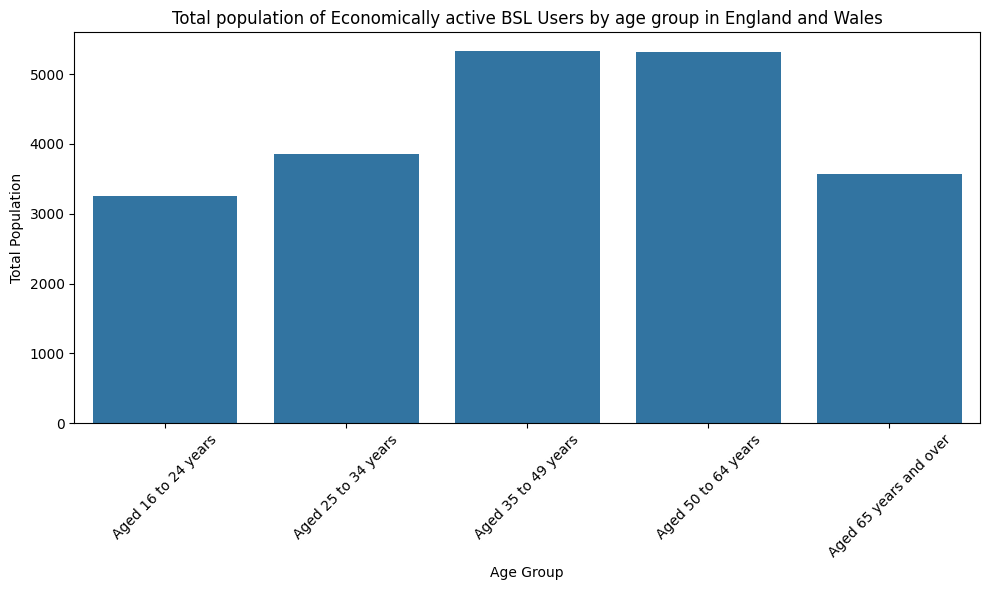

In [10]:
age_group_obs = bsl_users.groupby('Age')['Observation'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_obs.index, y=age_group_obs.values)
plt.xlabel('Age Group')
plt.ylabel('Total Population')
plt.title('Total population of Economically active BSL Users by age group in England and Wales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

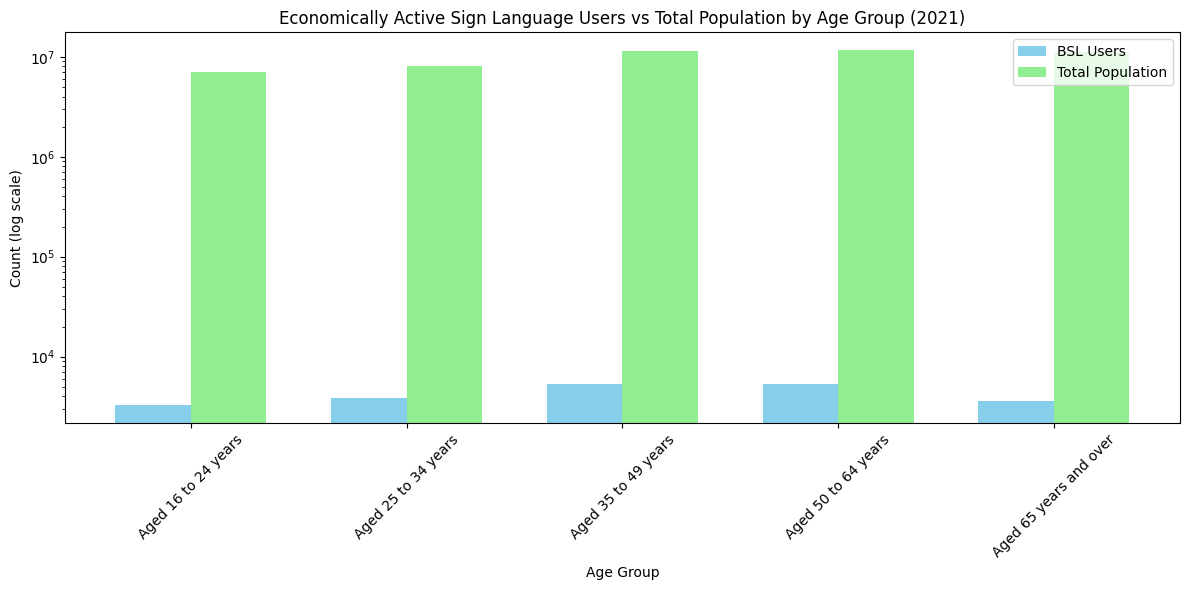


Percentage of economically active BSL users in total population:
Aged 16 to 24 years: 0.0466%
Aged 25 to 34 years: 0.0481%
Aged 35 to 49 years: 0.0463%
Aged 50 to 64 years: 0.0457%
Aged 65 years and over: 0.0320%
0.21864385705651396


In [11]:
# Group UK population data according to the same age groups as BSL users
if 'age_group_map' not in locals():
    age_group_map = {
        'Aged 16 to 24 years': ['15 to 19', '20 to 24'],
        'Aged 25 to 34 years': ['25 to 29', '30 to 34'],
        'Aged 35 to 49 years': ['35 to 39', '40 to 44', '45 to 49'],
        'Aged 50 to 64 years': ['50 to 54', '55 to 59', '60 to 64'],
        'Aged 65 years and over': ['65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89', '90 and over']
    }

# Convert Population column to numeric by removing commas
ew_pop['Population'] = ew_pop['Population'].str.replace(',', '').astype(float)

pop_grouped = pd.Series(dtype='float64')
for group, ranges in age_group_map.items():
    pop_grouped[group] = ew_pop[ew_pop['Age Groups'].isin(ranges)]['Population'].sum()

# Create figure with a larger size
plt.figure(figsize=(12, 6))

# Set width of bars and positions
width = 0.35
x = np.arange(len(age_group_obs.index))

# Create bars
plt.bar(x - width/2, age_group_obs.values, width, label='BSL Users', color='skyblue')
plt.bar(x + width/2, pop_grouped.values, width, label='Total Population', color='lightgreen')

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Count (log scale)')
plt.title('Economically Active Sign Language Users vs Total Population by Age Group (2021)')
plt.xticks(x, age_group_obs.index, rotation=45)
plt.legend()
plt.yscale('log')  # Using log scale due to large difference in values
plt.tight_layout()

# Show the plot
plt.show()

total_percent = 0

# Calculate and print percentage differences
print("\nPercentage of economically active BSL users in total population:")
for age, obs, pop in zip(age_group_obs.index, age_group_obs.values, pop_grouped.values):
    percentage = (obs/pop) * 100
    total_percent = total_percent + percentage
    print(f"{age}: {percentage:.4f}%")

print(total_percent)

The data validates the reference [here](https://www.signature.org.uk/census-2021-british-sign-language/). Bear in mind that the population of BSL Users vs total population is only for England and Wales.

It is hard to quantify the deaf population in England and Wales as the census data logs members with hearing loss of levels beneath 20dB or worse which groups a lot of users who are hard of hearing but do not necessarily require sign to communicate. We have to use sources from [RNID](https://rnid.org.uk/get-involved/research-and-policy/facts-and-figures/prevalence-of-deafness-and-hearing-loss/) with their estimates for the population.

In [12]:
estimated_deaf_population = 1200000

print(f"Percentage of estimated deaf population vs UK total population: {round(estimated_deaf_population/ew_total_population * 100, 2)}%")

Percentage of estimated deaf population vs UK total population: 2.01%


References to read

- [Hearing loss prevalence and years lived with disability, 1990–2019: findings from the Global Burden of Disease Study 2019](https://www.sciencedirect.com/science/article/pii/S014067362100516X?pes=vor&utm_source=tfo&getft_integrator=tfo)
- [Motion Eye OS](https://github.com/motioneye-project/motioneyeos)